In [84]:
import numpy as np
import pandas as pd

df = pd.read_csv("spam.csv" , encoding = "ISO-8859-1" )

>>>>Data Cleaning 
>>>>EDA
>>>>Text Preprocessing
>>>>Model building
>>>>Evaluation

In [85]:
df.shape

(5572, 5)

In [86]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4686,ham,Eatin my lunch...,NaN,NaN,NaN
4233,ham,Now only i reached home. . . I am very tired n...,NaN,NaN,NaN
5087,ham,"Good morning, im suffering from fever and dyse...",NaN,NaN,NaN
5100,ham,"Aight, call me once you're close",NaN,NaN,NaN
2020,ham,Anything lor but toa payoh got place 2 walk me...,NaN,NaN,NaN


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [88]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)


In [89]:
print(df.columns)


Index(['v1', 'v2'], dtype='object')


In [90]:
df.sample(5)

,v1,v2
4340,ham,ÌÏ all write or wat..
2159,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...
3919,spam,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...
401,ham,Dear how is chechi. Did you talk to her
5321,ham,Ok no problem... Yup i'm going to sch at 4 if ...


In [91]:
#rename the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
4573,ham,:( but your not here....
912,ham,Can't. I feel nauseous. I'm so pissed. I didn'...
4042,ham,I am literally in bed and have been up for lik...
2654,ham,Its sarcasm.. .nt scarcasim
456,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN..."


In [92]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [93]:
df['target'] = encoder.fit_transform(df['target'])

In [94]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
#remove missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [96]:
#check for duplicates
df.duplicated().sum()

np.int64(403)

In [97]:
df = df.drop_duplicates(keep='first')

In [98]:
df.shape

(5169, 2)

EDA

In [99]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

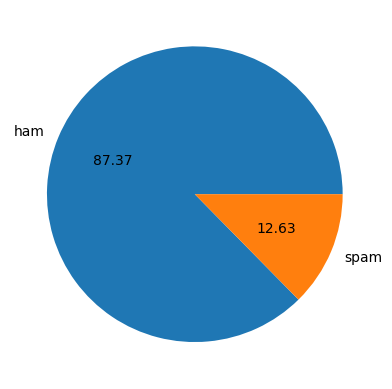

In [100]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

NLP

In [101]:
import nltk

In [102]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [103]:
df.columns

Index(['target', 'text'], dtype='object')

In [104]:
df['num_characters'] = df['text'].apply(len)

In [105]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [106]:
df['num_words']= df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [107]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [108]:
df['num_sentences']= df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [109]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [110]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [111]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

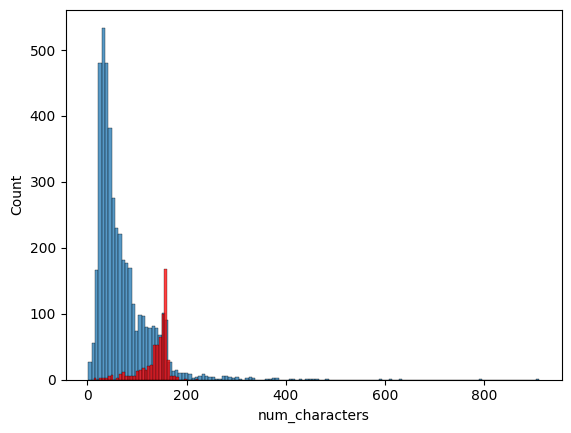

In [113]:
import seaborn as sns
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

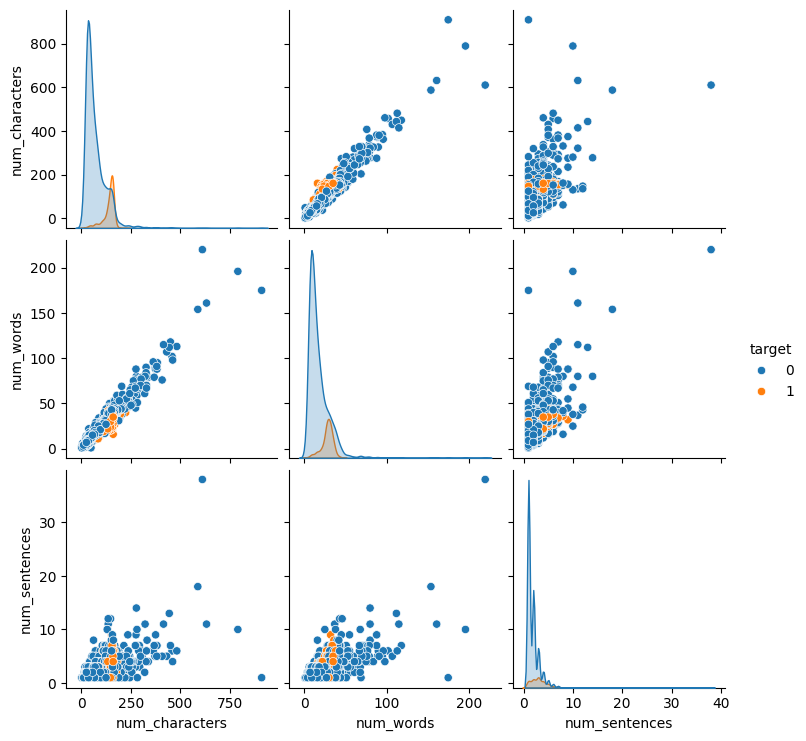

In [114]:
sns.pairplot(df , hue='target')

<Axes: >

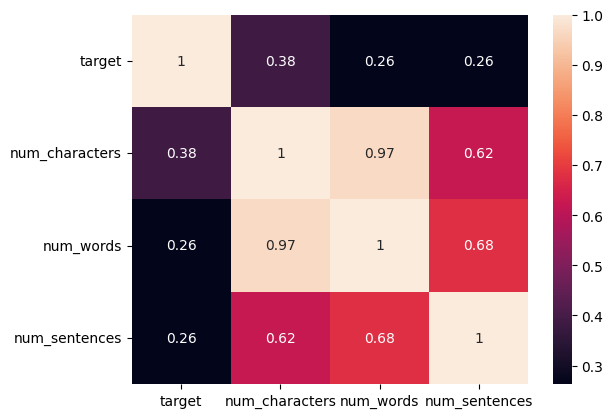

In [115]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

Data Preprocessing

In [116]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [117]:
stopwords.words('english')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [118]:
import string

In [119]:
def transform_text(text):
    text = text.lower()
    text= nltk.word_tokenize(text)

    y = []

    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text: # stemming
        y.append(ps.stem(i))
        
    return " ".join(y)

In [120]:
transform_text("I'm gonna be home soon and i don't  want to talk to anyone about it")

'gon na home soon want talk anyon'

In [121]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [122]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [123]:
df['transformed_text'] = df["text"].apply(transform_text)

In [124]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [125]:
import wordcloud
from wordcloud import WordCloud

In [126]:
wc = WordCloud(width=500 ,height=500 , min_font_size=10, background_color='white')

In [127]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep= " "))

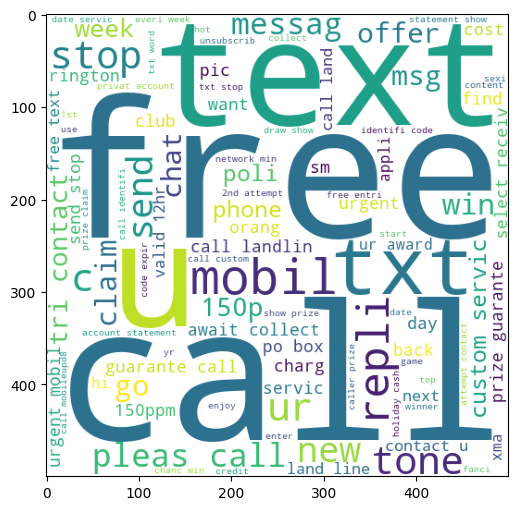

In [128]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [129]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep= " "))

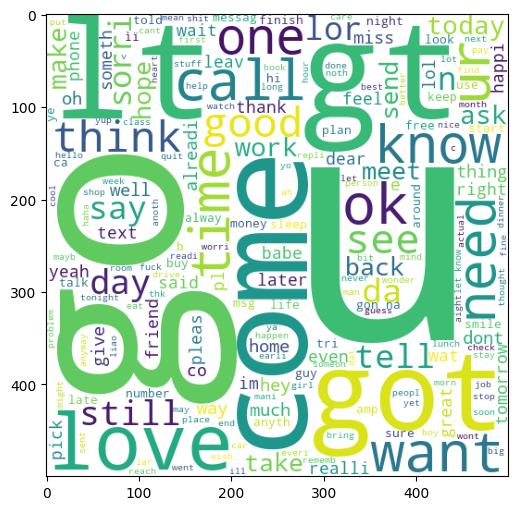

In [130]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [131]:
spam_corpus = []

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [132]:
len(spam_corpus)

9939

In [133]:
from collections import Counter

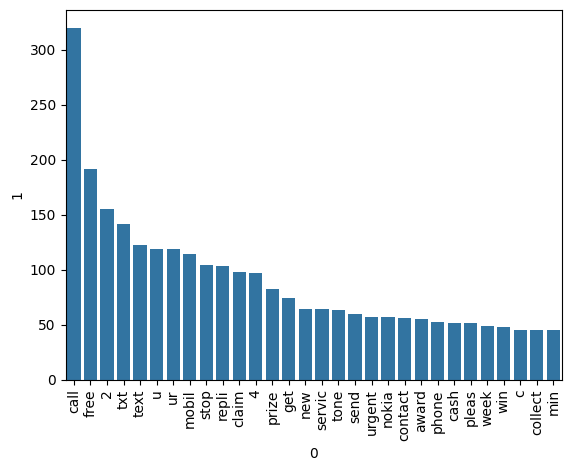

In [134]:
sns.barplot(x = pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [135]:
ham_corpus = []

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [136]:
len(ham_corpus)

35404

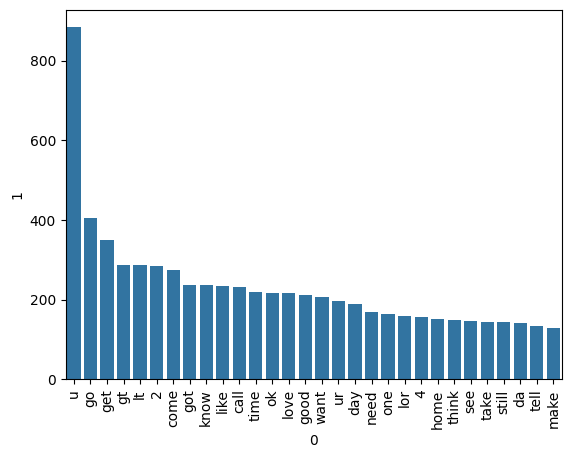

In [137]:
sns.barplot(x = pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [138]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Model Building

In [139]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer 
cv = CountVectorizer()
tiidf = TfidfVectorizer(max_features =3000)

In [140]:
x = tiidf.fit_transform(df['transformed_text']).toarray()

In [141]:
x.shape

(5169, 3000)

In [142]:
x[0].shape

(3000,)

In [143]:
y = df['target'].values

In [144]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [145]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix , precision_score

In [146]:
gnb = GaussianNB()
mng = MultinomialNB()
bnb = BernoulliNB()

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size=0.2 , random_state=2)

In [149]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.874274661508704
[[790 106]
 [ 24 114]]
0.5181818181818182


In [150]:
mng.fit(x_train,y_train)
y_pred1 = mng.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [151]:
bnb.fit(x_train,y_train)
y_pred1 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [152]:
import pickle

In [154]:
pickle.dump(tiidf, open('vectorizer.pkl','wb'))
pickle.dump(mng, open('model.pkl','wb'))